# JSON
JSON은 새로운 언어는 아니다. 자바스크립트 문맥에서 '발견'한 언어이다. XML보다 묘사력은 더 떨어지나, 더욱 간단하고 가볍다는 특징을 지닌다.

In [15]:
import json
data = '''[
    { "id":"1",
      "email":"pangpaul@korea.ac.kr",
      "name":"Paul"
    },
    { "id":"2",
      "email":"korra0501@gmail.com",
      "name":"Theodore"
    }
]''' #LIST OF DICTIONAIRES

info = json.loads(data) # PARSE JSON SYNTAX TO PYTHON
print('User Count: ',len(info))
for item in info:
    print('Name', item['name'])
    print('Id', item['id'])
    print('Email', item['email'])

User Count:  2
Name Paul
Id 1
Email pangpaul@korea.ac.kr
Name Theodore
Id 2
Email korra0501@gmail.com


## Service-Oriented Architectures - APIs
이제부터는 데이터 소비자의 관점에서 바라보자.

In [16]:
import urllib.request, urllib.parse, urllib.error
import json

# Note that Google is increasingly requiring keys
# for this API
serviceurl = 'http://maps.googleapis.com/maps/api/geocode/json?'

while True:
    address = input('Enter location: ')
    if len(address) < 1: break #엔터치면 break

    url = serviceurl + urllib.parse.urlencode(
        {'address': address})

    print('Retrieving', url)
    uh = urllib.request.urlopen(url) # handle: doesn't actually pull the data down
    data = uh.read().decode()
    print('Retrieved', len(data), 'characters')

    try:
        js = json.loads(data) # js is a dictionary
    except:
        js = None

    if not js or 'status' not in js or js['status'] != 'OK': # 실제 js를 보면 잘 작동했을 경우 OK이므로
        print('==== Failure To Retrieve ====')
        print(data)
        continue

    print(json.dumps(js, indent=4)) # pretty print string representation of JSON it with an indent of four

    lat = js["results"][0]["geometry"]["location"]["lat"] # WALKING DOWN A TREE(DICTS)
    lng = js["results"][0]["geometry"]["location"]["lng"]
    print('lat', lat, 'lng', lng)
    location = js['results'][0]['formatted_address']
    print(location)

Enter location: Ann Arbor, MI
Retrieving http://maps.googleapis.com/maps/api/geocode/json?address=Ann+Arbor%2C+MI
Retrieved 271 characters
==== Failure To Retrieve ====
{
   "error_message" : "You have exceeded your daily request quota for this API. We recommend registering for a key at the Google Developers Console: https://console.developers.google.com/apis/credentials?project=_",
   "results" : [],
   "status" : "OVER_QUERY_LIMIT"
}

Enter location: 


## Twitter API
같이 저장되어 있는 다른 .py 파일들 반드시 확인할 것!

In [2]:
import urllib.request, urllib.parse, urllib.error
from twurl import augment
import ssl

###### TEST #######
# https://apps.twitter.com/
# Create App and get the four strings, put them in hidden.py

print('* Calling Twitter...')
url = augment('https://api.twitter.com/1.1/statuses/user_timeline.json',
              {'screen_name': 'drchuck', 'count': '2'})
print(url)

# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

connection = urllib.request.urlopen(url, context=ctx)
data = connection.read()
print(data)

print ('======================================')
headers = dict(connection.getheaders())
print(headers)

* Calling Twitter...
https://api.twitter.com/1.1/statuses/user_timeline.json?oauth_consumer_key=OeVVxC5qxY7g0mXZP2sVO6Kbc&oauth_timestamp=1531503319&oauth_nonce=36021931&oauth_version=1.0&screen_name=drchuck&count=2&oauth_token=1017815308420014080-rh3ZZLtw1ijzdi2XZGbtpZ7fSo4qrc&oauth_signature_method=HMAC-SHA1&oauth_signature=GIIU27URt2HXpf7EwcW6CYUhX84%3D
b'[{"created_at":"Fri Jul 13 13:41:22 +0000 2018","id":1017765932310126592,"id_str":"1017765932310126592","text":"RT @OpenSourceOrg: OSI stickers: \\u2714\\nOSI brochures: \\u2714\\nOSI neck pillows: \\u2714\\nOSI posters:\\u2714\\nOSI cupcakes: \\u2714\\nOSI doughnuts: \\u2714\\nOSI anniversary swag\\u2026","truncated":false,"entities":{"hashtags":[],"symbols":[],"user_mentions":[{"screen_name":"OpenSourceOrg","name":"OpenSourceInitiative","id":408847389,"id_str":"408847389","indices":[3,17]}],"urls":[]},"source":"\\u003ca href=\\"http:\\/\\/twitter.com\\" rel=\\"nofollow\\"\\u003eTwitter Web Client\\u003c\\/a\\u003e","in_reply_to_s

In [3]:
import twurl
# https://apps.twitter.com/
# Create App and get the four strings, put them in hidden.py

TWITTER_URL = 'https://api.twitter.com/1.1/statuses/user_timeline.json'

# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

while True:
    print('')
    acct = input('Enter Twitter Account:')
    if (len(acct) < 1): break
    url = twurl.augment(TWITTER_URL,
                        {'screen_name': acct, 'count': '2'})
    print('Retrieving', url)
    connection = urllib.request.urlopen(url, context=ctx)
    data = connection.read().decode()
    print(data[:250])
    headers = dict(connection.getheaders())
    # print headers
    print('Remaining', headers['x-rate-limit-remaining'])


Enter Twitter Account:@0BKNJqhqNW3tzcL
Retrieving https://api.twitter.com/1.1/statuses/user_timeline.json?oauth_consumer_key=OeVVxC5qxY7g0mXZP2sVO6Kbc&oauth_timestamp=1531503326&oauth_nonce=67452753&oauth_version=1.0&screen_name=%400BKNJqhqNW3tzcL&count=2&oauth_token=1017815308420014080-rh3ZZLtw1ijzdi2XZGbtpZ7fSo4qrc&oauth_signature_method=HMAC-SHA1&oauth_signature=8GscA5Rzul9wPfVhtMrz0m3iOIs%3D
[{"created_at":"Fri Jul 13 17:33:03 +0000 2018","id":1017824239217344512,"id_str":"1017824239217344512","text":"RT @ddalgitomi: Ahn Yoojin pointed out Hitomi top-toeing to match their height and said she\u2019s cute!\nHitomi: You\u2019re saying I\u20
Remaining 894

Enter Twitter Account:


In [4]:
import urllib.request, urllib.parse, urllib.error
import json
import ssl

# https://apps.twitter.com/
# Create App and get the four strings, put them in hidden.py

TWITTER_URL = 'https://api.twitter.com/1.1/friends/list.json'

# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

while True:
    print('')
    acct = input('Enter Twitter Account:')
    if (len(acct) < 1): break
    url = twurl.augment(TWITTER_URL,
                        {'screen_name': acct, 'count': '5'})
    print('Retrieving', url)
    connection = urllib.request.urlopen(url, context=ctx)
    data = connection.read().decode()

    js = json.loads(data)
    print(json.dumps(js, indent=2))

    headers = dict(connection.getheaders())
    print('Remaining', headers['x-rate-limit-remaining'])

    for u in js['users']:
        print(u['screen_name'])
        if 'status' not in u:
            print('   * No status found')
            continue
        s = u['status']['text']
        print('  ', s[:50])


Enter Twitter Account:@0BKNJqhqNW3tzcL
Retrieving https://api.twitter.com/1.1/friends/list.json?oauth_consumer_key=OeVVxC5qxY7g0mXZP2sVO6Kbc&oauth_timestamp=1531503363&oauth_nonce=47693462&oauth_version=1.0&screen_name=%400BKNJqhqNW3tzcL&count=5&oauth_token=1017815308420014080-rh3ZZLtw1ijzdi2XZGbtpZ7fSo4qrc&oauth_signature_method=HMAC-SHA1&oauth_signature=uV01Wx6i6%2Bg%2BnayG6aGJfx95Q%2FM%3D
{
  "users": [
    {
      "id": 15670515,
      "id_str": "15670515",
      "name": "Windows",
      "screen_name": "Windows",
      "location": "Redmond, Washington",
      "description": "Windows news, product info & global stories of people using Windows technology to #DoGreatThings. For support tweet @MicrosoftHelps",
      "url": "http://t.co/ytunfEM2E8",
      "entities": {
        "url": {
          "urls": [
            {
              "url": "http://t.co/ytunfEM2E8",
              "expanded_url": "http://windows.microsoft.com",
              "display_url": "windows.microsoft.com",
      

Enter Twitter Account:


## JSON의 기본 개념

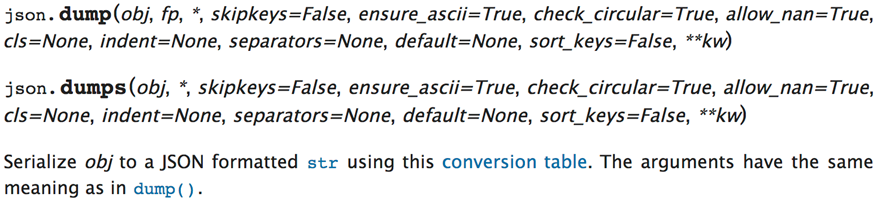

In [2]:
name = ("Lee", "Chuck", "Steve")
age = [30, 43, 50]
person = {"name":"Lee", "age":30, "car":False}

In [3]:
nameStr = json.dumps(name)
ageStr = json.dumps(age)
personStr = json.dumps(person, indent="  ")

In [6]:
korname = ("이", "척", "스티브")
kornameStr = json.dumps(korname)
# 인터넷상에서는 바이트값으로 전송하기 때문에, 중간에 손실된다. 그래서 조건을 넣어줘야 한다.
print(kornameStr)

["\uc774", "\ucc99", "\uc2a4\ud2f0\ube0c"]


In [7]:
kornameStr = json.dumps(korname, ensure_ascii=False)
print(kornameStr)

["이", "척", "스티브"]


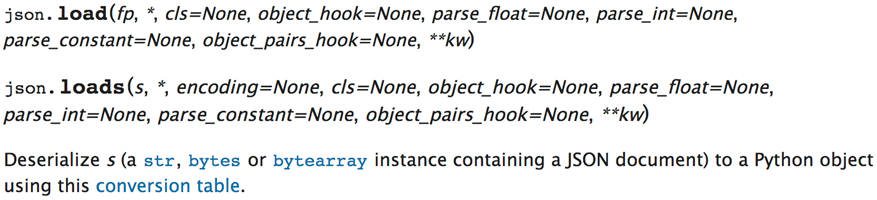

In [8]:
personObj = json.loads(personStr)
personObj

{'age': 30, 'car': False, 'name': 'Lee'}

In [9]:
person == personObj

True

In [10]:
personObj["car"] = ["레이", "모닝"]
personObj

{'age': 30, 'car': ['레이', '모닝'], 'name': 'Lee'}

In [11]:
with open("test.json", "w") as f:
    json.dump(personObj, f)

In [12]:
with open("test.json", "r") as f:
    loadObj = json.load(f)

In [13]:
loadObj

{'age': 30, 'car': ['레이', '모닝'], 'name': 'Lee'}

In [18]:
import urllib.request
reap = urllib.request.urlopen("https://jsonplaceholder.typicode.com/posts/1")
text = reap.read()

In [19]:
type(text)

bytes

In [21]:
#byte에서 string변환
textStr = text.decode("utf-8")
type(textStr)

str

In [22]:
textStr

'{\n  "userId": 1,\n  "id": 1,\n  "title": "sunt aut facere repellat provident occaecati excepturi optio reprehenderit",\n  "body": "quia et suscipit\\nsuscipit recusandae consequuntur expedita et cum\\nreprehenderit molestiae ut ut quas totam\\nnostrum rerum est autem sunt rem eveniet architecto"\n}'

In [23]:
# json to python object
reapObj = json.loads(textStr)
print(reapObj)

{'userId': 1, 'id': 1, 'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit', 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}


In [24]:
for x in reapObj.items():
    print(x)

('userId', 1)
('id', 1)
('title', 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit')
('body', 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto')


# 공공데이터 분석

In [53]:
from urllib.request import urlopen
import urllib.parse as up

url ="http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getMsrstnAcctoRltmMesureDnsty?serviceKey=ckzCRkQ0HOEcHoV%2BZ5N0fDqDm6Jyp4oTXIZdL5NduqXd%2BbEs%2BZOvsAgOmvuR2YgF5uNI88ARNfA726SEAAAHKA%3D%3D&numOfRows=10&pageSize=10&pageNo=1&startPage=1&stationName=%EC%A2%85%EB%A1%9C%EA%B5%AC&dataTerm=DAILY&ver=1.3&_returnType=json"
resp = urlopen(url)
text = resp.read()
textStr = text.decode("utf-8")
airdic = json.loads(textStr)
airdic

{'ArpltnInforInqireSvcVo': {'_returnType': 'json',
  'coGrade': '',
  'coValue': '',
  'dataTerm': 'DAILY',
  'dataTime': '',
  'khaiGrade': '',
  'khaiValue': '',
  'mangName': '',
  'no2Grade': '',
  'no2Value': '',
  'numOfRows': '10',
  'o3Grade': '',
  'o3Value': '',
  'pageNo': '1',
  'pm10Grade': '',
  'pm10Grade1h': '',
  'pm10Value': '',
  'pm10Value24': '',
  'pm25Grade': '',
  'pm25Grade1h': '',
  'pm25Value': '',
  'pm25Value24': '',
  'resultCode': '',
  'resultMsg': '',
  'rnum': 0,
  'serviceKey': 'ckzCRkQ0HOEcHoV+Z5N0fDqDm6Jyp4oTXIZdL5NduqXd+bEs+ZOvsAgOmvuR2YgF5uNI88ARNfA726SEAAAHKA==',
  'sidoName': '',
  'so2Grade': '',
  'so2Value': '',
  'stationCode': '',
  'stationName': '종로구',
  'totalCount': '',
  'ver': '1.3'},
 'list': [{'_returnType': 'json',
   'coGrade': '1',
   'coValue': '0.3',
   'dataTerm': '',
   'dataTime': '2018-07-13 14:00',
   'khaiGrade': '2',
   'khaiValue': '54',
   'mangName': '도시대기',
   'no2Grade': '1',
   'no2Value': '0.015',
   'numOfRows': 

In [104]:
from urllib import parse
url ="http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getMsrstnAcctoRltmMesureDnsty"

params = {"serviceKey":"9yufdGwfG5nTrm48106s%2B%2FQK%2Bz6byu8kQyqGYX7ywOTcSZz5hKnJG6OSAFPymm3Ei6TrKcsL3Osas1zm4v6HmA%3D%3D",
          "numOfRows":10,
          "pageSize":10,
          "pageNo":1,
          "startPage":1,
          "sidoName":None,
          "ver":1.3,
          "_returnType":"json"}

In [105]:
params["sidoName"] = "서울"

# byte를 역으로 string으로 바꾸기
params['serviceKey'] = urllib.parse.unquote(params['serviceKey'])

#url 만들어주기
paramurl = parse.urlencode(params)
# byte로 변환
parambyte = paramurl.encode("utf-8")

In [106]:
# request
req = urllib.request.Request(url, data=parambyte)
# response
res = urllib.request.urlopen(req)

result = res.read()

In [108]:
result = result.decode("utf-8")
resObj = json.loads(result)

resjson = json.dumps(resObj, indent="   ")
print(resjson)

{
   "ArpltnInforInqireSvcVo": {
      "_returnType": "json",
      "coGrade": "",
      "coValue": "",
      "dataTerm": "",
      "dataTime": "",
      "khaiGrade": "",
      "khaiValue": "",
      "mangName": "",
      "no2Grade": "",
      "no2Value": "",
      "numOfRows": "10",
      "o3Grade": "",
      "o3Value": "",
      "pageNo": "1",
      "pm10Grade": "",
      "pm10Grade1h": "",
      "pm10Value": "",
      "pm10Value24": "",
      "pm25Grade": "",
      "pm25Grade1h": "",
      "pm25Value": "",
      "pm25Value24": "",
      "resultCode": "",
      "resultMsg": "",
      "rnum": 0,
      "serviceKey": "9yufdGwfG5nTrm48106s+/QK+z6byu8kQyqGYX7ywOTcSZz5hKnJG6OSAFPymm3Ei6TrKcsL3Osas1zm4v6HmA==",
      "sidoName": "\uc11c\uc6b8",
      "so2Grade": "",
      "so2Value": "",
      "stationCode": "",
      "stationName": "",
      "totalCount": "",
      "ver": "1.3"
   }
}


In [94]:
# 두번째 방법.
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus, unquote

url = 'http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getCtprvnRltmMesureDnsty' 
queryParams = '?' + urlencode({ quote_plus('ServiceKey') : unquote('9yufdGwfG5nTrm48106s%2B%2FQK%2Bz6byu8kQyqGYX7ywOTcSZz5hKnJG6OSAFPymm3Ei6TrKcsL3Osas1zm4v6HmA%3D%3D'), 
                               quote_plus('numOfRows') : '10', 
                               quote_plus('pageSize') : '10',
                               quote_plus('pageNo') : '1',
                               quote_plus('startPage') : '1',
                               quote_plus('sidoName') : '서울', 
                               quote_plus('ver') : '1.3',
                               quote_plus('_returnType') : 'json'})
# 위의 service key가 보내는 결과는 달라짐. 이는 byte code로 되어있는 key를 다시 byte code로 바꾸는 것이 된다
request = Request(url + queryParams)
request.get_method = lambda: 'GET'
response_body = urlopen(request).read()
print(response_body)

b'{"list":[{"_returnType":"json","coGrade":"1","coValue":"0.3","dataTerm":"","dataTime":"2018-07-13 15:00","khaiGrade":"1","khaiValue":"43","mangName":"\xeb\x8f\x84\xec\x8b\x9c\xeb\x8c\x80\xea\xb8\xb0","no2Grade":"1","no2Value":"0.015","numOfRows":"10","o3Grade":"1","o3Value":"0.024","pageNo":"1","pm10Grade":"1","pm10Grade1h":"1","pm10Value":"17","pm10Value24":"21","pm25Grade":"1","pm25Grade1h":"1","pm25Value":"10","pm25Value24":"13","resultCode":"","resultMsg":"","rnum":0,"serviceKey":"","sidoName":"","so2Grade":"1","so2Value":"0.003","stationCode":"","stationName":"\xec\xa4\x91\xea\xb5\xac","totalCount":"","ver":""},{"_returnType":"json","coGrade":"1","coValue":"0.5","dataTerm":"","dataTime":"2018-07-13 15:00","khaiGrade":"2","khaiValue":"53","mangName":"\xeb\x8f\x84\xeb\xa1\x9c\xeb\xb3\x80\xeb\x8c\x80\xea\xb8\xb0","no2Grade":"1","no2Value":"0.027","numOfRows":"10","o3Grade":"1","o3Value":"0.019","pageNo":"1","pm10Grade":"2","pm10Grade1h":"1","pm10Value":"28","pm10Value24":"33","pm25

In [130]:
url_test = "http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getCtprvnMesureSidoLIst?"
params = {"serviceKey":"9yufdGwfG5nTrm48106s%2B%2FQK%2Bz6byu8kQyqGYX7ywOTcSZz5hKnJG6OSAFPymm3Ei6TrKcsL3Osas1zm4v6HmA%3D%3D",
          "numOfRows":10,
          "pageSize":10,
          "pageNo":1,
          "startPage":1,
          "sidoName":"서울",
          "searchCondition":"DAILY",
          "ver":1.3,
          "_returnType":"json"}

In [131]:
# byte를 역으로 string으로 바꾸기
params['serviceKey'] = urllib.parse.unquote(params['serviceKey'])

params = parse.urlencode(params)
params = params.encode("utf-8")
# request
req = urllib.request.Request(url_test, data=params)
res = urllib.request.urlopen(req)

result = res.read()

result = result.decode("utf-8")
resObj = json.loads(result)

# dump는 객체를 json포맷 str로 변환한다. 그러므로 resjson의 type은 str.
resjson = json.dumps(resObj, indent="   ")
print(resjson)

{
   "list": [
      {
         "_returnType": "json",
         "cityName": "\uac15\ub0a8\uad6c",
         "cityNameEng": "Gangnam-gu",
         "coValue": "0.3",
         "dataGubun": "",
         "dataTime": "2018-07-13 15:00",
         "districtCode": "02",
         "districtNumSeq": "001",
         "itemCode": "",
         "khaiValue": "",
         "no2Value": "0.016",
         "numOfRows": "10",
         "o3Value": "0.022",
         "pageNo": "1",
         "pm10Value": "15",
         "pm25Value": "8",
         "resultCode": "",
         "resultMsg": "",
         "searchCondition": "",
         "serviceKey": "",
         "sidoName": "\uc11c\uc6b8",
         "so2Value": "0.005",
         "totalCount": ""
      },
      {
         "_returnType": "json",
         "cityName": "\uac15\ub3d9\uad6c",
         "cityNameEng": "Gangdong-gu",
         "coValue": "0.3",
         "dataGubun": "",
         "dataTime": "2018-07-13 15:00",
         "districtCode": "02",
         "districtNumSeq": 

In [132]:
resObj

{'CtprvnMesureLIstVo2': {'_returnType': 'json',
  'cityName': '',
  'cityNameEng': '',
  'coValue': '',
  'dataGubun': '',
  'dataTime': '',
  'districtCode': '',
  'districtNumSeq': '',
  'itemCode': '',
  'khaiValue': '',
  'no2Value': '',
  'numOfRows': '10',
  'o3Value': '',
  'pageNo': '1',
  'pm10Value': '',
  'pm25Value': '',
  'resultCode': '',
  'resultMsg': '',
  'searchCondition': 'DAILY',
  'serviceKey': '9yufdGwfG5nTrm48106s+/QK+z6byu8kQyqGYX7ywOTcSZz5hKnJG6OSAFPymm3Ei6TrKcsL3Osas1zm4v6HmA==',
  'sidoName': '서울',
  'so2Value': '',
  'totalCount': ''},
 'list': [{'_returnType': 'json',
   'cityName': '강남구',
   'cityNameEng': 'Gangnam-gu',
   'coValue': '0.3',
   'dataGubun': '',
   'dataTime': '2018-07-13 15:00',
   'districtCode': '02',
   'districtNumSeq': '001',
   'itemCode': '',
   'khaiValue': '',
   'no2Value': '0.016',
   'numOfRows': '10',
   'o3Value': '0.022',
   'pageNo': '1',
   'pm10Value': '15',
   'pm25Value': '8',
   'resultCode': '',
   'resultMsg': '',
  

# XML(eXtensible Markup Language)
1. 자신만의 태그를 지정할 수 있다.
2. Validation이 된다.
3. 노드에다 설명을 달아놓을 수 있다.
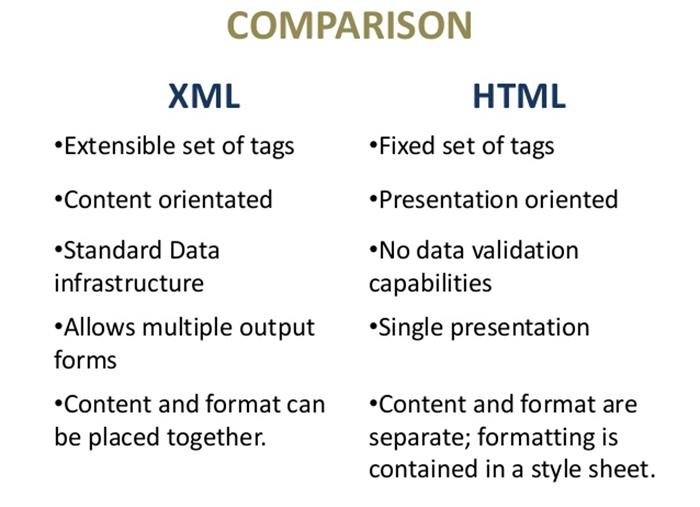

## XML VS JSON

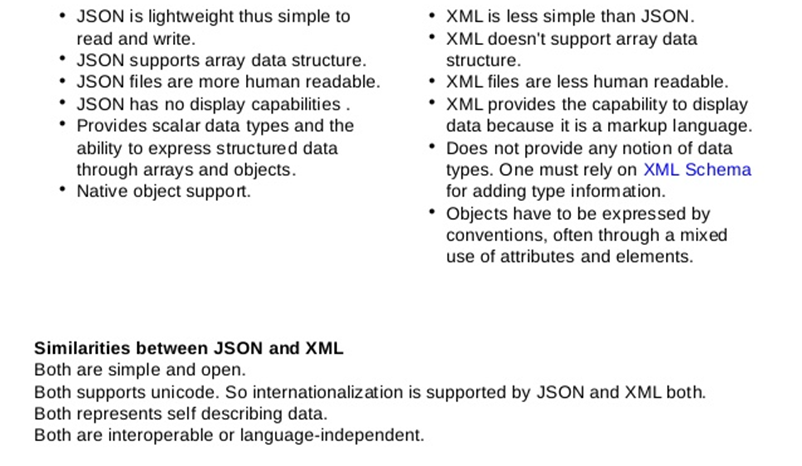

XML은 돔트리의 특정한 노드 하나에 접근할 수 있어, JSON처럼 차례/구조대로 접근하지 않아도 된다.
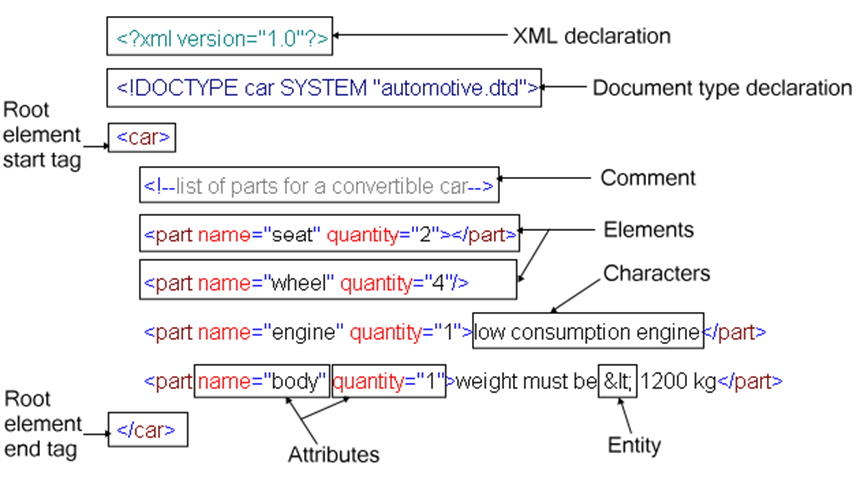
1. All elements must have a closing tag
2. Opening and closing tags must be written with the same case
3. all elements must be properly nested within each other

## XML Attributes
왼쪽보다는 오른쪽을 사용하자.
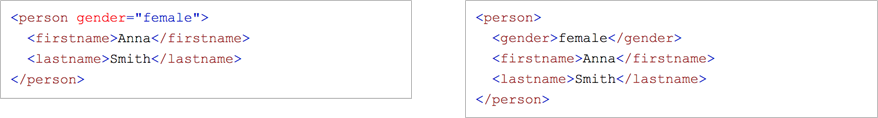

# LXML

In [135]:
from lxml import etree as et

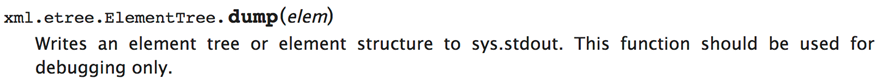

In [144]:
bookstore = et.Element("bookstore")

book1 = et.Element("book", category="cooking")
bookstore.insert(0, book1)

book1 = etree.SubElement(bookstore, "book")
book1.attrib['category'] = "cooking"

et.SubElement(book1, "title", attrib={"lang":title1.get("lang")})

book2 = etree.SubElement(bookstore, "book", attrib={"category":"children"})

title2 = et.Element("title")
title2.attrib["lang"] = "en"
title2.text = "Harry Potter"
book2.append(title2)

et.dump(bookstore)

<bookstore>
  <book category="cooking"/>
  <book category="cooking">
    <title lang="en"/>
  </book>
  <book category="children">
    <title lang="en">Harry Potter</title>
  </book>
</bookstore>


In [151]:
xml_byte = et.tostring(bookstore, xml_declaration=True, encoding="utf-8")

In [152]:
xml_byte

b'<?xml version=\'1.0\' encoding=\'utf-8\'?>\n<bookstore><book category="cooking"/><book category="cooking"><title lang="en"/></book><book category="children"><title lang="en">Harry Potter</title></book></bookstore>'

In [153]:
temp = et.fromstring(xml_byte)
et.dump(temp)

<bookstore>
  <book category="cooking"/>
  <book category="cooking">
    <title lang="en"/>
  </book>
  <book category="children">
    <title lang="en">Harry Potter</title>
  </book>
</bookstore>


In [157]:
# Parsing
tree = et.ElementTree(temp)
root = tree.getroot()

In [158]:
root.tag

'bookstore'

In [162]:
children = root.getchildren()

for child in children:
    print(child.tag, child.get("category"))

book cooking
book cooking
book children


In [1]:
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus, unquote

from lxml import etree

url = 'http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getCtprvnMesureSidoLIst' 

params = {'ServiceKey' : unquote('9yufdGwfG5nTrm48106s%2B%2FQK%2Bz6byu8kQyqGYX7ywOTcSZz5hKnJG6OSAFPymm3Ei6TrKcsL3Osas1zm4v6HmA%3D%3D'), 
                               'numOfRows' : '10', 
                               'pageSize' : '10',
                               'pageNo' : '1',
                               'startPage' : '1',
                               'sidoName' : '서울', 
                               'searchCondition' : 'DAILY',
                               'ver' : '1.3'}
params = urlencode(params)
params = params.encode("utf-8")

# 위의 service key가 보내는 결과는 달라짐. 이는 byte code로 되어있는 key를 다시 byte code로 바꾸는 것이 된다
request = Request(url, data = params)
response = urlopen(request)
resStr = response.read()

xml = etree.XML(resStr)
xmlTree = etree.ElementTree(xml)
xmlRoot = xmlTree.getroot()
xmlByte = etree.tostring(xmlRoot, xml_declaration=True, encoding='utf-8', pretty_print=True)
xmlStr = etree.tounicode(xmlRoot, pretty_print=True)
print(xmlStr)

<response>
	<header>
		<resultCode>00</resultCode>
		<resultMsg>NORMAL SERVICE.</resultMsg>
	</header>
	<body>
		<items>
			
				<item>
				    <dataTime>2018-07-16 10:00</dataTime>
				    <cityName>강남구</cityName>
				    <so2Value>0.005</so2Value>
				    <coValue>0.3</coValue>
				    <o3Value>0.011</o3Value>
				    <no2Value>0.019</no2Value>
				    <pm10Value>12</pm10Value>
				    <pm25Value>7</pm25Value>
				</item>
			
				<item>
				    <dataTime>2018-07-16 10:00</dataTime>
				    <cityName>강동구</cityName>
				    <so2Value>-</so2Value>
				    <coValue>0.4</coValue>
				    <o3Value>0.008</o3Value>
				    <no2Value>0.020</no2Value>
				    <pm10Value>22</pm10Value>
				    <pm25Value>11</pm25Value>
				</item>
			
				<item>
				    <dataTime>2018-07-16 10:00</dataTime>
				    <cityName>강북구</cityName>
				    <so2Value>0.003</so2Value>
				    <coValue>0.3</coValue>
				    <o3Value>0.015</o3Value>
				    <no2Value>0.022</no2Value>
				    <pm10Value>15</pm10Value>
				  

In [2]:
import xml.etree.ElementTree as ET

input = '''
<stuff>
    <users>
        <user x="2">
            <id>001</id>
            <name>Chuck</name>
        </user>
        <user x="7">
            <id>009</id>
            <name>Brent</name>
        </user>
    </users>
</stuff>'''

stuff = ET.fromstring(input)
lst = stuff.findall('users/user')
print('User count:', len(lst))

for item in lst:
    print('Name', item.find('name').text)
    print('Id', item.find('id').text)
    print('Attribute', item.get("x"))

User count: 2
Name Chuck
Id 001
Attribute 2
Name Brent
Id 009
Attribute 7
